Hunter Bennett | Glass Lab | Kupffer Strains | 07 Feb 2021
_____
Note that this has an ATAC TBA script at the end that we can use to help us implement TBA

In [2]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 200
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df

Set working directory

In [3]:
dataDirectory = '/gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control_30week/'
workingDirectory = '/home/h1bennet/strains/results/03_Strains_Control_30weeks_ATAC/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

# Quality control

In [4]:
qc = ngs_qc(dataDirectory, 'atac')

/gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control_30week//
./control_30week_qc/


<Figure size 432x288 with 0 Axes>

In [5]:
qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,unmappedReads,uniquelyMappedFraction,mappedFraction
00_NCoRWT_Kupffer_ATAC_ControlDiet_30week_LN134B_JSS_TDT_160921,6078794.0,57.0,0.003394,1.522,-1.0,24458167.0,14418539.0,5462867.0,4576761.0,0.589518,0.812874
00_NCoRWT_Kupffer_ATAC_ControlDiet_30week_LN134D_JSS_TDT_160921,5725028.0,56.0,0.003223,1.534,-1.0,27264743.0,13520493.0,4869915.0,8874335.0,0.495897,0.674512
01_balbc_Kupffer_ATAC_ControlDiet_30week_Balb1A_JSS_TDT_160926,11386065.0,56.0,0.005321,1.272,-1.0,28663067.0,16710298.0,6139465.0,5813304.0,0.582991,0.797185
01_balbc_Kupffer_ATAC_ControlDiet_30week_Balb1B_JSS_TDT_160926,9460597.0,57.0,0.004760,1.370,-1.0,25446368.0,14965517.0,4921559.0,5559292.0,0.588120,0.781529
02_aj_Kupffer_ATAC_ControlDiet_30week_AJ1B_JSS_TDT_160926,7089383.0,57.0,0.004712,1.810,-1.0,24833625.0,14500170.0,5329546.0,5003909.0,0.583893,0.798503
02_aj_Kupffer_ATAC_ControlDiet_30week_AJ1C_JSS_TDT_160928,8986714.0,57.0,0.004854,1.470,-1.0,24162167.0,14863398.0,5383653.0,3915116.0,0.615152,0.837965


### Plot tag count distribution

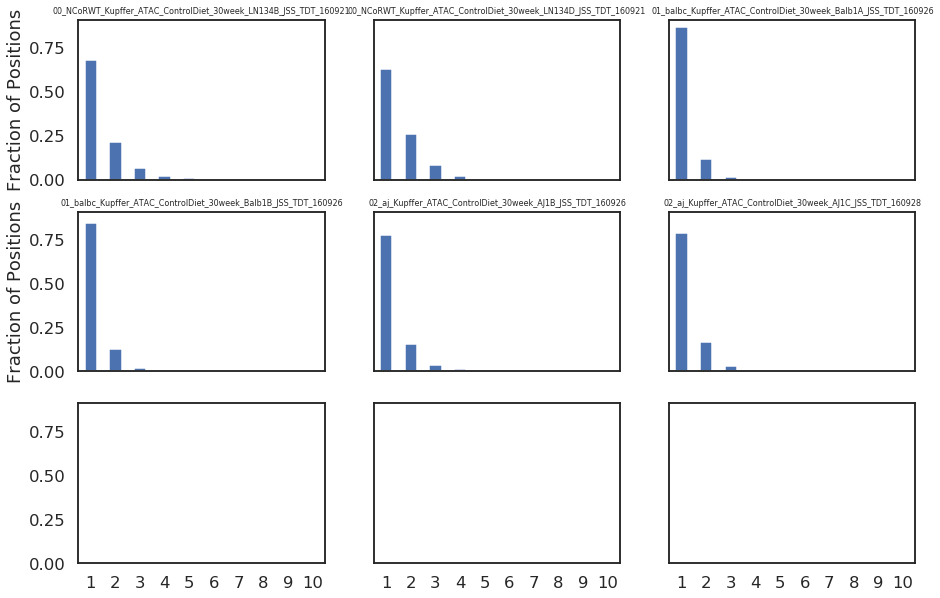

In [5]:
tds = glob.glob(dataDirectory+'/*')
tds = np.sort(tds)

fig, axs = plt.subplots(3,3, figsize=(15, 10), sharex=True, sharey=True)

for ax, td in zip(axs.flatten(), tds):
    df = pd.read_csv(td+'/tagCountDistribution.txt', sep='\t', index_col=0)
    df.loc[1:10, :].plot.bar(ax=ax, legend=False)
    ax.set_xlabel('Tags per position')
    ax.set_ylabel('Fraction of Positions')
    ax.set_title(td.split('/')[-1].split('_AL')[0], fontsize=8)

plt.savefig('./control_30week_qc/tag_count_distribution.png', bbox_inches='tight')

### make browser hub (run on command line for now)

|Colors:|      |
|------|------|
|AJ:| 228,26,28|  
|Balb:| 55,126,184| 
|C57:| 77,175,74|



In [8]:
makeMultiWigHub.pl hrb_strains_atac_control_30weeks mm10 -force -color \
77,175,74 77,175,74 \
55,126,184 55,126,184 \
228,26,28 228,26,28 \
-d /gpfs/data01/glasslab/home/h1bennet/strains/data/ATAC/control_30week/*

SyntaxError: invalid syntax (<ipython-input-8-2a8ec57607b8>, line 1)

# Call Peaks

In [6]:
%%bash
# delete the existing script file
rm ./peakCalling_homer.sh
# create a script file
touch ./peakCalling_homer.sh

# if directories don't exist, create them
if [ ! -d ./atac_peak_files/ ]; then mkdir ./atac_peak_files; fi

rm: cannot remove ‘./peakCalling_homer.sh’: No such file or directory


In [7]:
with open('./peakCalling_homer.sh', 'w') as f:
    for tagdir in os.listdir(dataDirectory):
        find_peaks_idr = ['findPeaks', dataDirectory + '/' + tagdir,
                          '-L', '0', '-C', '0', '-fdr', '0.9', '-style',
                          'factor', '-size', '200', '>',
                          workingDirectory + '/atac_peak_files/' + tagdir + '_peaks.tsv',
                          '&', '\n']
        find_peaks = ['findPeaks', dataDirectory + '/' + tagdir,
                      '-style', 'factor', '-size', '200', '>',
                      workingDirectory + '/atac_peak_files/' + tagdir + '_default_peaks.tsv',
                      '&', '\n']
        # write commands to file
        f.write(' '.join(find_peaks_idr))
        f.write(' '.join(find_peaks))
f.close()

### compile peak stats for QC

In [8]:
peak_stats={}

for td in os.listdir('./atac_peak_files/'):

    peak_dict = {'total_peaks': 0,
                 'ip_eff': 0.0,
                 'peaks_filt_input': 0,
                 'peaks_filt_local': 0,
                 'peaks_filt_clonal':0}

    with open('./atac_peak_files/'+td, 'r') as f:
        for line in f.readlines():
            if "total peaks" in line:
                peak_dict['total_peaks'] = int(line.split(' = ')[-1])
            if "Approximate IP efficiency" in line:
                peak_dict['ip_eff'] = float(line.replace('%\n', '').split(' = ')[-1])
            if "Putative peaks filtered by input" in line:
                peak_dict['peaks_filt_input'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered by local signal" in line:
                peak_dict['peaks_filt_local'] = int(line.split(' = ')[-1])
            if "Putative peaks filtered for being too clonal" in line:
                peak_dict['peaks_filt_clonal'] = int(line.split(' = ')[-1])
                
    peak_stats[td] = peak_dict
            
df = pd.DataFrame(peak_stats).T

In [9]:
df.sort_index(inplace=True)

### Save to file

In [11]:
df.loc[df.index.str.contains('default'), :].to_csv('./default_peak_table.txt', sep='\t')
df.loc[~df.index.str.contains('default'), :].to_csv('./idr_peak_table.txt', sep='\t')

# Run IDR

In [19]:
%%bash
# delete the existing script file
rm ./run_idr.sh
# create a script file
touch ./run_idr.sh

# if directories don't exist, create them
if [ ! -d ./atac_idr/ ]; then mkdir ./atac_idr; fi

In [23]:
import itertools
mylist = os.listdir(dataDirectory)
mylist.sort()
# use pattern to extract cell type
with open('./run_idr.sh', 'w') as f:
    for i, j in itertools.combinations(mylist, r=2):
        run_idr = ['python', '/home/jtao/code/seq_merge_pipe/run_idr_homerPeaks.py',
                             workingDirectory + '/atac_peak_files/' + i + '_peaks.tsv',
                             workingDirectory + '/atac_peak_files/' + j + '_peaks.tsv',
                             './atac_idr/', '-threshold', '0.01', '&\n']
        # run on samples in same group
        m = [i.split('_')[0] + '_' + i.split('_')[1],
             j.split('_')[0] + '_' + j.split('_')[1]]
        # if same cell type and not same sample run idr on them
        if (m[0] == m[1]) & (i != j):
            # ('i:', i, 'j:', j)
            f.write(' '.join(run_idr))
        

### in terminal select IDR replicates with highest number of peaks

Then rename to a more tractable title and move into idr_peaks folder

  26873 atac_idr/00_NCoRWT_Kupffer_ATAC_ControlDiet_30week_LN134B_JSS_TDT_160921_peaks_00_NCoRWT_Kupffer_ATAC_ControlDiet_30week_LN134D_JSS_TDT_160921_peaks_idr.tsv
  26778 atac_idr/01_balbc_Kupffer_ATAC_ControlDiet_30week_Balb1A_JSS_TDT_160926_peaks_01_balbc_Kupffer_ATAC_ControlDiet_30week_Balb1B_JSS_TDT_160926_peaks_idr.tsv
  36183 atac_idr/02_aj_Kupffer_ATAC_ControlDiet_30week_AJ1B_JSS_TDT_160926_peaks_02_aj_Kupffer_ATAC_ControlDiet_30week_AJ1C_JSS_TDT_160928_peaks_idr.tsv

In [24]:
%%bash

# if directories don't exist, create them
if [ ! -d ./idr_peaks/ ]; then mkdir ./idr_peaks; fi

cp ./atac_idr/00_NCoRWT_Kupffer_ATAC_ControlDiet_30week_LN134B_JSS_TDT_160921_peaks_00_NCoRWT_Kupffer_ATAC_ControlDiet_30week_LN134D_JSS_TDT_160921_peaks_idr.tsv \
./idr_peaks/00_NCoRWT_Kupffer_ATAC_ControlDiet_30weeks_idr_peaks.tsv

cp ./atac_idr/01_balbc_Kupffer_ATAC_ControlDiet_30week_Balb1A_JSS_TDT_160926_peaks_01_balbc_Kupffer_ATAC_ControlDiet_30week_Balb1B_JSS_TDT_160926_peaks_idr.tsv \
./idr_peaks/01_balbc_Kupffer_ATAC_ControlDiet_30weeks_idr_peaks.tsv

cp ./atac_idr/02_aj_Kupffer_ATAC_ControlDiet_30week_AJ1B_JSS_TDT_160926_peaks_02_aj_Kupffer_ATAC_ControlDiet_30week_AJ1C_JSS_TDT_160928_peaks_idr.tsv \
./idr_peaks/02_aj_Kupffer_ATAC_CCl4_6wk_idr_peaks.tsv

### Next move on to annotation section or to running TBA

In [26]:
%%bash
# delete the existing script file
rm ./run_tba.sh
# create a script file
touch ./run_tba.sh

# if directories don't exist, create them
if [ ! -d ./bed_files/ ]; then mkdir ./bed_files; fi
if [ ! -d ./peak_sequences/ ]; then mkdir ./peak_sequences; fi
if [ ! -d ./background_files/ ]; then mkdir ./background_files; fi
if [ ! -d ./tba_output/ ]; then mkdir ./tba_output; fi

# for each peak file create several commands
for peak_file in ./idr_peaks/*;

# generate name of bed file
do bed_file=${peak_file/tsv/bed};
bed_file=${bed_file/idr_peaks/bed_files}
# call Homer pos2bed.pl to create bed file
echo "pos2bed.pl $peak_file > $bed_file" >> ./run_tba.sh

# generate peak sequence fasta file name
seq_file=${bed_file/peaks.bed/peaks.fasta};
seq_file=${seq_file/bed_files/peak_sequences};

# execute command to extract sequences
echo "/home/h1bennet/code/tba/model_training/extract_sequences.py $bed_file mm10 $seq_file">> ./run_tba.sh

# generate background coordinates
echo "/home/h1bennet/code/tba/model_training/generate_background_coordinates.py $bed_file mm10 ./background_files/">> ./run_tba.sh

# rename background file
bg_seq_file=${seq_file/peak_sequences/background_files};
bg_seq_file=${bg_seq_file/peaks.fasta/background.fasta};
echo "mv ./background_files/background.fasta $bg_seq_file">> ./run_tba.sh
echo "/home/h1bennet/code/tba/model_training/create_features.py -num_procs 40 $seq_file $bg_seq_file ./tba_output /home/h1bennet/code/tba/default_motifs/*">> ./run_tba.sh

# calculate motif scores for peaks and background
combined_features=${seq_file/peak_sequences/tba_output}
combined_features=${combined_features/.fasta/_combined_features.tsv}
labels=${combined_features/combined_features.tsv/labels.txt}
echo "/home/h1bennet/code/tba/model_training/train_classifier.py $combined_features $labels ./tba_output/">> ./run_tba.sh
coeff_path=${combined_features/combined_features.tsv/coefficients.tsv}
performance_path=${combined_features/combined_features.tsv/performance.tsv}
echo "mv ./tba_output/coefficients.tsv $coeff_path">> ./run_tba.sh
echo "mv ./tba_output/performance.tsv $performance_path">> ./run_tba.sh

# perform insilico mutagenesis
echo "/home/h1bennet/code/tba/model_training/calc_feature_significance.py $combined_features $labels ./tba_output/ -num_iterations 1">> ./run_tba.sh
significance_path=${combined_features/combined_features.tsv/significance.tsv}
echo mv ./tba_output/significance.tsv $significance_path>> ./run_tba.sh

done